<a href="https://colab.research.google.com/github/narfdf999/Arquitectura/blob/master/Comprobacion_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, BatchNormalization, Reshape, Conv2DTranspose
from keras.models import Model ,Sequential, load_model
from keras.optimizers import Adam
from keras import backend as K


In [0]:
x_train = np.load('/content/drive/My Drive/1260_mercator/mercator_total.npy')

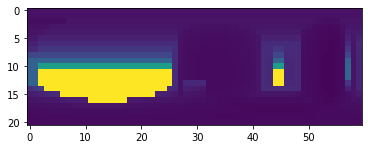

In [25]:
plt.imshow(x_train[120],vmin=-1,vmax=1)

In [26]:
x_train_au = np.expand_dims(x_train,axis=-1)
print(x_train_au.shape)

(57461, 21, 60, 1)


In [0]:
autoencoder = load_model('autoencoder_definitivo.h5')

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 21, 60, 1)         0         
_________________________________________________________________
encoder (Sequential)         (None, 128)               2279904   
_________________________________________________________________
decoder (Sequential)         (None, 21, 60, 1)         461825    
Total params: 2,741,729
Trainable params: 2,737,633
Non-trainable params: 4,096
_________________________________________________________________


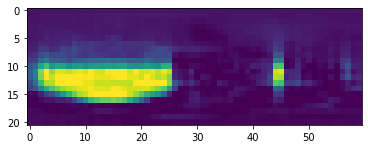

In [28]:
autoencoder.summary()
# evaluate the model
score = autoencoder.predict(x_train_au[0:122])
score = np.squeeze(score, axis=-1)
plt.imshow(score[120],vmin=-1,vmax=1)

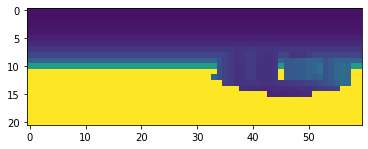

In [21]:
plt.imshow(x_train[10],vmin=-1,vmax=1)

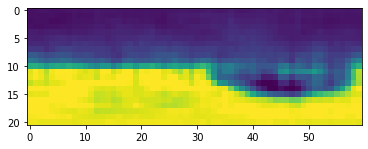

In [22]:
plt.imshow(score[10],vmin=-1,vmax=1)